In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
!pip install Pillow==9.5.0

In [2]:
#Loading dataset and describing
df = pd.read_csv('/content/Car_Speed.csv')
print(df.head())

   day            Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0    1  7/10/2022 0:00            NaN            NaN            3.0   
1    1  7/10/2022 0:01           10.0           62.0            2.0   
2    1  7/10/2022 0:02            5.0           63.6            4.0   
3    1  7/10/2022 0:03           11.0           58.2            9.0   
4    1  7/10/2022 0:04           19.0           60.2           17.0   

   WAVE-SW-Speed  Month  Year  
0           59.5     10  2021  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  


In [3]:
print(df.describe())

                 day  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
count  223048.000000  218324.000000  218324.000000  218613.000000   
mean       15.843863      49.757951      61.758002      38.232324   
std         8.788900      34.568520       3.577977      29.641309   
min         1.000000       0.000000       0.000000       0.000000   
25%         8.000000      15.000000      60.800000      10.000000   
50%        16.000000      50.000000      62.400000      35.000000   
75%        23.000000      77.000000      63.600000      59.000000   
max        31.000000     214.000000      90.500000     155.000000   

       WAVE-SW-Speed          Month           Year  
count  218613.000000  223048.000000  223048.000000  
mean       61.066343       6.544506    2021.495570  
std         4.140103       4.568554       0.499981  
min         0.000000       1.000000    2021.000000  
25%        60.200000       2.000000    2021.000000  
50%        61.800000      10.000000    2021.000000  
75%    

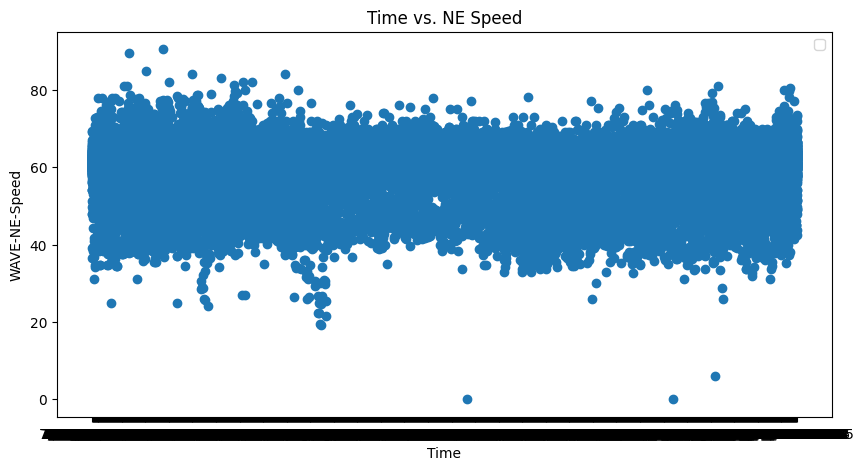

In [4]:
#Ploting dall data
plt.figure(figsize=(10, 5))
plt.scatter(df['Time'], df['WAVE-NE-Speed'])
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Time vs. NE Speed')
plt.legend()
plt.show()

In [5]:
#Setting threshold to speed between 45 to 75
import pandas as pd
lower_threshold = 45
upper_threshold = 75
df_cleandata = df[(df['WAVE-NE-Speed'] >= lower_threshold) & (df['WAVE-NE-Speed'] <= upper_threshold)]
print(df_cleandata.head()) # Now df refers to the original DataFrame and you can call head()

   day            Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
1    1  7/10/2022 0:01           10.0           62.0            2.0   
2    1  7/10/2022 0:02            5.0           63.6            4.0   
3    1  7/10/2022 0:03           11.0           58.2            9.0   
4    1  7/10/2022 0:04           19.0           60.2           17.0   
5    1  7/10/2022 0:05            9.0           58.2            3.0   

   WAVE-SW-Speed  Month  Year  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  
5           60.8     10  2021  


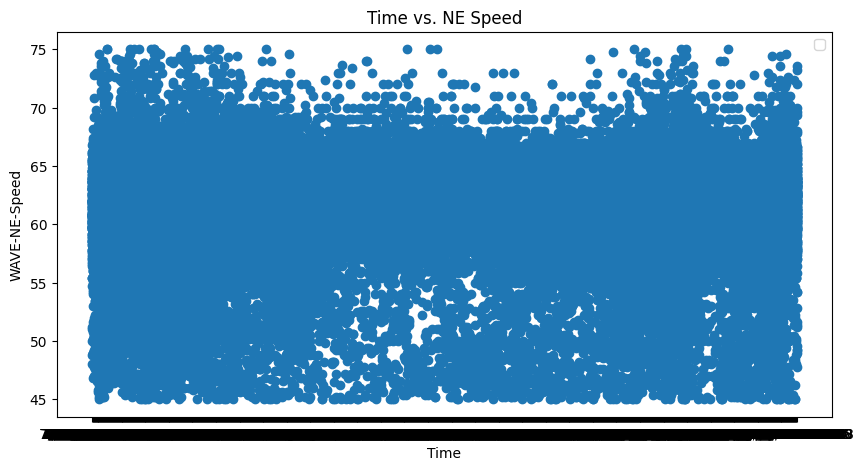

In [6]:
#Plot Speed vs. Time for cleaned dataset
plt.figure(figsize=(10, 5))
plt.scatter(df_cleandata['Time'], df_cleandata['WAVE-NE-Speed'])
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Time vs. NE Speed')
plt.legend()
plt.show()

In [7]:
#Spliting data into 80 training and 20 testing
!pip install scikit-learn


In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'WAVE-NE-Speed' is the target variable and 'Time' is the feature
X = df_cleandata['Time'].values.reshape(-1, 1)  # Reshape to a 2D array for scikit-learn
y = df_cleandata['WAVE-NE-Speed']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Training a simple Linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'WAVE-NE-Speed' is the target variable and 'Time' is the feature
# Convert 'Time' column to datetime objects
df_cleandata['Time'] = pd.to_datetime(df_cleandata['Time'])

# Extract numerical features from datetime objects (e.g., timestamp)
X = df_cleandata['Time'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = df_cleandata['WAVE-NE-Speed']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

<ipython-input-9-661139a77df8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleandata['Time'] = pd.to_datetime(df_cleandata['Time'])


LinearRegression()

In [10]:
#Evaluating the model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target values using the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 9.073468415164523
R-squared: 0.0007872574617601158


In [11]:
#Activity 2
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#step 1 Using K-Means clustering
# Selecting relevant features for clustering (speed columns)
df_cluster = df_cleandata[['WAVE-NE-Speed', 'WAVE-SW-Speed']].dropna()

# Standardizing the data for better clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Step 1: KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

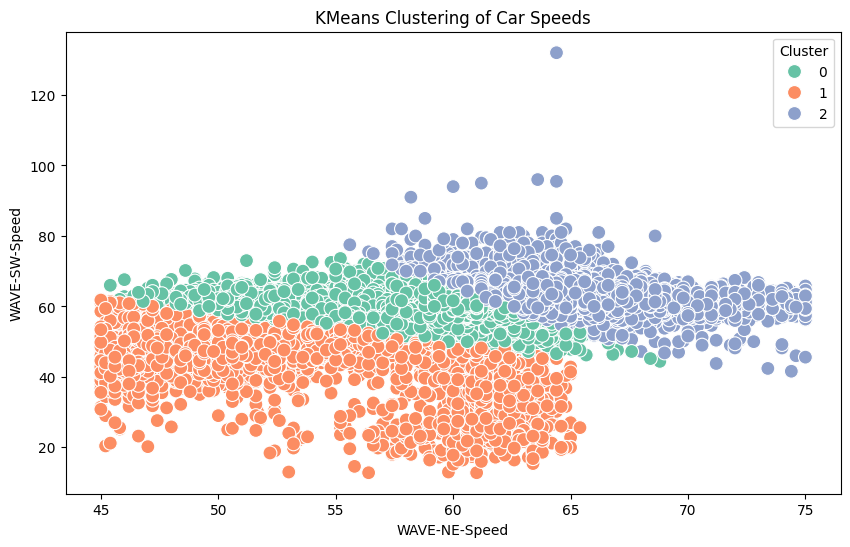

In [13]:
#Step 2 Visualizing the clusters on a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WAVE-NE-Speed', y='WAVE-SW-Speed', hue='Cluster', data=df_cluster, palette='Set2', s=100)
plt.title('KMeans Clustering of Car Speeds')
plt.xlabel('WAVE-NE-Speed')
plt.ylabel('WAVE-SW-Speed')
plt.show()

<ipython-input-15-2dedafd8108c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleandata['Time'] = pd.to_datetime(df_cleandata['Time'])
<ipython-input-15-2dedafd8108c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleandata['Minutes'] = df_cleandata['Time'].dt.hour * 60 + df_cleandata['Time'].dt.minute
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw

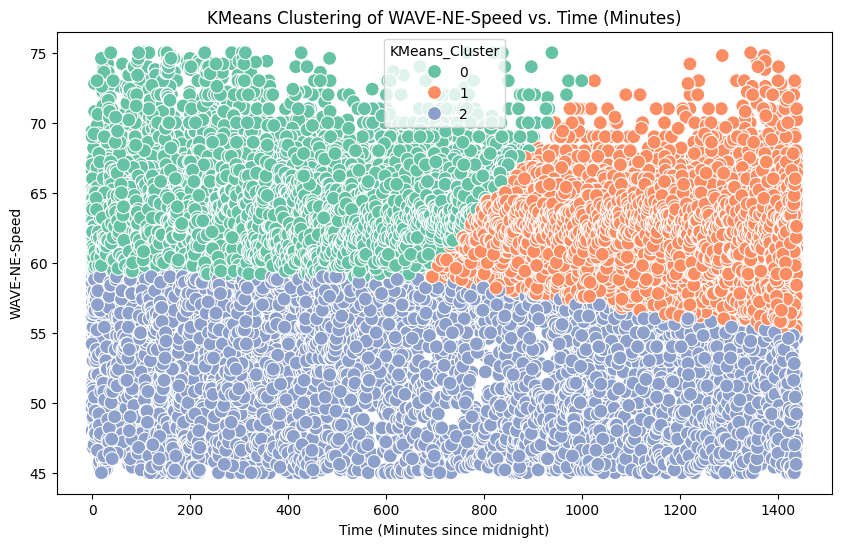

In [15]:
#K-Means clustering for Speed vs. Time
# Convert 'Time' to datetime format
df_cleandata['Time'] = pd.to_datetime(df_cleandata['Time'])

# Convert 'Time' to minutes (hours * 60 + minutes)
df_cleandata['Minutes'] = df_cleandata['Time'].dt.hour * 60 + df_cleandata['Time'].dt.minute

# Dropping rows with missing WAVE-NE-Speed or Minutes values
df_cluster = df_cleandata[['WAVE-NE-Speed', 'Minutes']].dropna()

# Standardizing the data for better clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Step 1: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Step 2: Visualizing the Clusters on a Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Minutes', y='WAVE-NE-Speed', hue='KMeans_Cluster', data=df_cluster, palette='Set2', s=100)
plt.title('KMeans Clustering of WAVE-NE-Speed vs. Time (Minutes)')
plt.xlabel('Time (Minutes since midnight)')
plt.ylabel('WAVE-NE-Speed')
plt.show()


In [ ]:
# Step 4: Exploring DBSCAN and Hierarchical Clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_cluster['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)
# Check for noise points labeled as -1
print(df_cluster['DBSCAN_Cluster'].value_counts())

In [1]:
# Hierarchical clustering (for visualizing dendrogram)
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_threshold=0, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

NameError: name 'scaled_data' is not defined

In [1]:
#Activity 3
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
#loading Ames Crashes dataset
df2 = pd.read_csv('/content/CrashData.csv')
print(df2.head())

<ipython-input-1-147c1e55914f>:7: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/CrashData.csv')


   STATE STATENAME  ST_CASE  VEH_NO_x  DAMAGE      DAMAGENAME  PEDS  \
0     19      Iowa   190001         1    11.0  11 Clock Value     0   
1     19      Iowa   190001         1    11.0  11 Clock Value     0   
2     19      Iowa   190001         1    11.0  11 Clock Value     0   
3     19      Iowa   190001         1    11.0  11 Clock Value     0   
4     19      Iowa   190001         1    13.0             Top     0   

   PERNOTMVIT  VE_TOTAL  VE_FORMS_x  ...  DRUGRES3  DRUGRES3NAME  P_SF1  \
0           0         1           1  ...       NaN           NaN    NaN   
1           0         1           1  ...       NaN           NaN    NaN   
2           0         1           1  ...       NaN           NaN    NaN   
3           0         1           1  ...       NaN           NaN    NaN   
4           0         1           1  ...       NaN           NaN    NaN   

   P_SF1NAME P_SF2  P_SF2NAME P_SF3  P_SF3NAME RACE  RACENAME  
0        NaN   NaN        NaN   NaN        NaN  NaN       

In [3]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36281 entries, 0 to 36280
Columns: 253 entries, STATE to RACENAME
dtypes: float64(44), int64(94), object(115)
memory usage: 70.0+ MB
None


In [19]:
print(df.describe())

                 day  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
count  223048.000000  218324.000000  218324.000000  218613.000000   
mean       15.843863      49.757951      61.758002      38.232324   
std         8.788900      34.568520       3.577977      29.641309   
min         1.000000       0.000000       0.000000       0.000000   
25%         8.000000      15.000000      60.800000      10.000000   
50%        16.000000      50.000000      62.400000      35.000000   
75%        23.000000      77.000000      63.600000      59.000000   
max        31.000000     214.000000      90.500000     155.000000   

       WAVE-SW-Speed          Month           Year  
count  218613.000000  223048.000000  223048.000000  
mean       61.066343       6.544506    2021.495570  
std         4.140103       4.568554       0.499981  
min         0.000000       1.000000    2021.000000  
25%        60.200000       2.000000    2021.000000  
50%        61.800000      10.000000    2021.000000  
75%    

In [5]:
# Step 3: Split data into features (X) and target variable (y)
X = df2[['HOUR_x', 'AGE', 'BODY_TYP']]  # Features
y = df2['INJ_SEV']  # Target variable

# Step 4: Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Import RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Step 6: Create a Random Forest model with n_estimators=100
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 7: Fit the model to the training data
model.fit(X_train, y_train)

# Step 8: Make predictions and evaluate crashes by age group
y_pred = model.predict(X_test)

# Step 9: Calculate accuracy score using accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Step 10: Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9147030453355381
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2538
           1       0.96      0.93      0.94       758
           2       0.82      0.83      0.83       705
           3       0.79      0.84      0.81       750
           4       0.92      0.90      0.91      2458
           5       1.00      0.70      0.82        10
           9       0.76      0.82      0.78        38

    accuracy                           0.91      7257
   macro avg       0.89      0.86      0.87      7257
weighted avg       0.92      0.91      0.92      7257

